<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/TXTA_Praxis_term2/blob/main/TXTA_session4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving bbc-fulltext.zip to bbc-fulltext.zip


In [2]:
!unzip /content/bbc-fulltext.zip

Archive:  /content/bbc-fulltext.zip
   creating: bbc/
   creating: bbc/business/
  inflating: bbc/business/001.txt    
  inflating: bbc/business/002.txt    
  inflating: bbc/business/003.txt    
  inflating: bbc/business/004.txt    
  inflating: bbc/business/005.txt    
  inflating: bbc/business/006.txt    
  inflating: bbc/business/007.txt    
  inflating: bbc/business/008.txt    
  inflating: bbc/business/009.txt    
  inflating: bbc/business/010.txt    
  inflating: bbc/business/011.txt    
  inflating: bbc/business/012.txt    
  inflating: bbc/business/013.txt    
  inflating: bbc/business/014.txt    
  inflating: bbc/business/015.txt    
  inflating: bbc/business/016.txt    
  inflating: bbc/business/017.txt    
  inflating: bbc/business/018.txt    
  inflating: bbc/business/019.txt    
  inflating: bbc/business/020.txt    
  inflating: bbc/business/021.txt    
  inflating: bbc/business/022.txt    
  inflating: bbc/business/023.txt    
  inflating: bbc/business/024.txt    
  infla

In [40]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
global_path = "/content/bbc/"
contents = []
for folder in ['business', 'entertainment', 'politics', 'sport', 'tech']:
  folder_path = global_path + folder + "/"
  files = os.listdir(folder_path)
  files = sorted(files)
  for file in files:
    file_path = folder_path + file
    with open(file_path, "r") as f:
      try:
        news_with_heading = f.read()
        heading = re.search(".*(?=\\n\\n)",news_with_heading).group()
        news = re.sub(heading, "", news_with_heading)
        contents.append((folder, heading, news))
      except:
        print(file_path)
        continue




/content/bbc/sport/199.txt


In [5]:
contents[0]

('business',
 'Ad sales boost Time Warner profit',
 '\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers 

In [6]:
dataframe = pd.DataFrame.from_records(contents, columns = ['topic', 'headline', 'news'])
dataframe

,topic,headline,news
0,business,Ad sales boost Time Warner profit,\n\nQuarterly profits at US media giant TimeWa...
1,business,Dollar gains on Greenspan speech,\n\nThe dollar has hit its highest level again...
2,business,Yukos unit buyer faces loan claim,\n\nThe owners of embattled Russian oil giant ...
3,business,High fuel prices hit BA's profits,\n\nBritish Airways has blamed high fuel price...
4,business,Pernod takeover talk lifts Domecq,\n\nShares in UK drinks and food firm Allied D...
...,...,...,...
2219,tech,BT program to beat dialler scams,\n\nBT is introducing two initiatives to help ...
2220,tech,Spam e-mails tempt net shoppers,\n\nComputer users across the world continue t...
2221,tech,Be careful how you code,\n\nA new European directive could put softwar...
2222,tech,US cyber security chief resigns,\n\nThe man making sure US computer networks a...


In [7]:
only_news = dataframe['news']

In [8]:
from wordcloud import WordCloud, STOPWORDS

In [9]:
#Basic preprocessing
corpus = [re.sub("\\n\\n", " ", s) for s in only_news]
corpus = [x.lower() for x in corpus]
corpus = [re.sub("[^a-z' ]+", "", x) for x in corpus]
corpus = [x.strip() for x in corpus]

In [10]:
corpus[0]

"quarterly profits at us media giant timewarner jumped  to bn m for the three months to december from m yearearlier the firm which is now one of the biggest investors in google benefited from sales of highspeed internet connections and higher advert sales timewarner said fourth quarter sales rose  to bn from bn its profits were buoyed by oneoff gains which offset a profit dip at warner bros and less users for aol time warner said on friday that it now owns  of searchengine google but its own internet business aol had has mixed fortunes it lost  subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aol's underlying profit before exceptional items rose  on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol's existing customers for highspeed broadband timewarner also has to restate  and  results follo

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words = STOPWORDS, ngram_range= (1,2), max_df = 0.7, min_df = 30, max_features = 200, token_pattern="[a-z']+")

In [13]:
tfidf_mat = tfidf.fit_transform(corpus)

In [14]:
tfidf_mat

<2224x200 sparse matrix of type '<class 'numpy.float64'>'
	with 66648 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score, make_scorer

In [16]:
def kappa_score(y_act, y_pred):
  return cohen_kappa_score(y_act, y_pred)

kappa = make_scorer(kappa_score)



In [17]:
lr = LogisticRegression(max_iter = 1000)
rf = RandomForestClassifier(n_estimators=500)

In [18]:
cross_val_score(lr, X= tfidf_mat, y = dataframe.topic, cv = 6, scoring = kappa)  #kappascore here is above 80% which we can consider to be very good as the thumb rule says that kappascore above 40% is considered to be acceptable, abpve 60% good, above 70% very good, above 80% extremely good

array([0.80769511, 0.91544352, 0.8815248 , 0.93567961, 0.9423121 ,
       0.90176961])

In [19]:
cross_val_score(rf, X = tfidf_mat, y = dataframe.topic, cv = 6, scoring = kappa) #kappa score for each cv

array([0.86460348, 0.92213279, 0.87807639, 0.91531227, 0.92529369,
       0.90504821])

Random forest performing better than logistic regression

In [20]:
rf.fit(X = tfidf_mat, y = dataframe.topic)

RandomForestClassifier(n_estimators=500)

In [21]:
rf.feature_importances_

array([0.00149152, 0.0028979 , 0.00142008, 0.00267205, 0.00148848,
       0.00109684, 0.00217764, 0.00099781, 0.00304018, 0.00904899,
       0.00290645, 0.00193469, 0.00699453, 0.00091278, 0.00167448,
       0.01002845, 0.03748742, 0.00385074, 0.00281646, 0.00171715,
       0.00413539, 0.00165136, 0.00170699, 0.00136253, 0.00502425,
       0.0058902 , 0.00157025, 0.00791654, 0.01669852, 0.01551445,
       0.00173515, 0.00172706, 0.00134096, 0.00280871, 0.00134899,
       0.00173601, 0.00176311, 0.00102337, 0.01018978, 0.00369082,
       0.00941493, 0.01155088, 0.02005257, 0.00156221, 0.00282364,
       0.00177084, 0.00192048, 0.00182187, 0.00139982, 0.00290351,
       0.00250974, 0.001267  , 0.00219547, 0.04659089, 0.00246768,
       0.01316772, 0.00542625, 0.00314215, 0.0017374 , 0.00180051,
       0.00168653, 0.0018214 , 0.0010904 , 0.01987161, 0.00695558,
       0.00368283, 0.00096597, 0.00131888, 0.00179693, 0.00183428,
       0.00290481, 0.00157402, 0.02989838, 0.00220402, 0.00229

In [22]:
np.argsort(rf.feature_importances_) #the 167th word has the lowest feature importance and then goes on

array([166,  13, 139,  66,   7,  37,  62,   5, 180,  93, 187,  98,  51,
       162, 121, 140,  67, 151,  85,  32,  34,  23,  48,   2,  91, 148,
       194, 138,   4,   0, 109, 143, 170, 129, 188,  43,  79,  26,  71,
       155, 113, 175, 137, 174,  21,  14,  60, 126,  90,  22, 111,  19,
        94,  31,  30,  35, 152,  58,  76, 114,  77, 190, 130,  36,  45,
       102,  68, 150,  59, 107,  61,  47, 144, 153,  69,  92, 163,  46,
        11, 125, 191, 169, 147, 142, 106, 176, 118,  88,  80,  82, 149,
         6, 134,  52, 156,  73,  96, 141, 165,  74, 145,  89, 108, 189,
       159,  97,  54, 164,  50, 101, 122, 161, 171, 196,  84, 131,   3,
        78, 117,  33,  18,  44, 173,   1,  49,  70,  10, 119, 172, 178,
         8, 195, 120,  83, 183,  57, 154,  99, 105,  65,  39, 199, 115,
        17,  87,  20, 146,  95, 136, 116, 186, 123, 132,  24, 197, 192,
        56, 198,  25, 135,  81, 167, 182,  64,  12, 103,  27, 185, 177,
         9,  40, 179, 181,  15,  38, 158, 124, 133,  41, 160,  5

In [23]:
np.argsort(rf.feature_importances_)[::-1] ##the 54th word has the highest feature importance and then goes on

array([ 53,  16,  72, 110, 168, 184, 100, 193, 112,  86,  42,  63, 127,
        75, 128,  28,  29, 104, 157,  55, 160,  41, 133, 124, 158,  38,
        15, 181, 179,  40,   9, 177, 185,  27, 103,  12,  64, 182, 167,
        81, 135,  25, 198,  56, 192, 197,  24, 132, 123, 186, 116, 136,
        95, 146,  20,  87,  17, 115, 199,  39,  65, 105,  99, 154,  57,
       183,  83, 120, 195,   8, 178, 172, 119,  10,  70,  49,   1, 173,
        44,  18,  33, 117,  78,   3, 131,  84, 196, 171, 161, 122, 101,
        50, 164,  54,  97, 159, 189, 108,  89, 145,  74, 165, 141,  96,
        73, 156,  52, 134,   6, 149,  82,  80,  88, 118, 176, 106, 142,
       147, 169, 191, 125,  11,  46, 163,  92,  69, 153, 144,  47,  61,
       107,  59, 150,  68, 102,  45,  36, 130, 190,  77, 114,  76,  58,
       152,  35,  30,  31,  94,  19, 111,  22,  90, 126,  60,  14,  21,
       174, 137, 175, 113, 155,  71,  26,  79,  43, 188, 129, 170, 143,
       109,   0,   4, 138, 194, 148,  91,   2,  48,  23,  34,  3

In [24]:
tfidf.vocabulary_ #shows the index number for each of the word --- key is the word and value is the index

{'able': 0,
 'according': 1,
 'action': 2,
 'added': 3,
 'already': 4,
 'another': 5,
 'around': 6,
 'away': 7,
 'back': 8,
 'bank': 9,
 'bbc': 10,
 'become': 11,
 'best': 12,
 'better': 13,
 'big': 14,
 'blair': 15,
 'bn': 16,
 'britain': 17,
 'british': 18,
 'brown': 19,
 'business': 20,
 'called': 21,
 'came': 22,
 'campaign': 23,
 'chief': 24,
 'club': 25,
 'come': 26,
 'companies': 27,
 'company': 28,
 'computer': 29,
 'countries': 30,
 'country': 31,
 'court': 32,
 'data': 33,
 'day': 34,
 'deal': 35,
 'decision': 36,
 'despite': 37,
 'digital': 38,
 'director': 39,
 'economic': 40,
 'economy': 41,
 'election': 42,
 'end': 43,
 'england': 44,
 'europe': 45,
 'european': 46,
 'even': 47,
 'every': 48,
 'executive': 49,
 'expected': 50,
 'far': 51,
 'figures': 52,
 'film': 53,
 'final': 54,
 'firm': 55,
 'firms': 56,
 'first': 57,
 'five': 58,
 'former': 59,
 'found': 60,
 'four': 61,
 'future': 62,
 'game': 63,
 'games': 64,
 'general': 65,
 'give': 66,
 'given': 67,
 'go': 68,
 '

In [25]:
reverse_vocab = {v:k for k,v in tfidf.vocabulary_.items()}

In [26]:
reverse_vocab

{0: 'able',
 1: 'according',
 2: 'action',
 3: 'added',
 4: 'already',
 5: 'another',
 6: 'around',
 7: 'away',
 8: 'back',
 9: 'bank',
 10: 'bbc',
 11: 'become',
 12: 'best',
 13: 'better',
 14: 'big',
 15: 'blair',
 16: 'bn',
 17: 'britain',
 18: 'british',
 19: 'brown',
 20: 'business',
 21: 'called',
 22: 'came',
 23: 'campaign',
 24: 'chief',
 25: 'club',
 26: 'come',
 27: 'companies',
 28: 'company',
 29: 'computer',
 30: 'countries',
 31: 'country',
 32: 'court',
 33: 'data',
 34: 'day',
 35: 'deal',
 36: 'decision',
 37: 'despite',
 38: 'digital',
 39: 'director',
 40: 'economic',
 41: 'economy',
 42: 'election',
 43: 'end',
 44: 'england',
 45: 'europe',
 46: 'european',
 47: 'even',
 48: 'every',
 49: 'executive',
 50: 'expected',
 51: 'far',
 52: 'figures',
 53: 'film',
 54: 'final',
 55: 'firm',
 56: 'firms',
 57: 'first',
 58: 'five',
 59: 'former',
 60: 'found',
 61: 'four',
 62: 'future',
 63: 'game',
 64: 'games',
 65: 'general',
 66: 'give',
 67: 'given',
 68: 'go',
 6

In [27]:
for k in np.argsort(rf.feature_importances_)[::-1]:
  print(reverse_vocab[k])

film
bn
government
mr
technology
users
market
win
music
labour
election
game
party
growth
people
company
computer
minister
show
firm
software
economy
players
online
side
digital
blair
us
uk
economic
bank
tv
using
companies
million
best
games
use
team
including
prime
club
year
firms
will
world
chief
play
one
video
new
public
m
sales
business
last
britain
net
years
director
general
mobile
many
service
first
used
information
number
won
back
two
time
now
bbc
good
executive
according
told
england
british
data
news
hit
added
plans
international
work
three
spokesman
office
may
expected
system
final
make
six
way
months
law
said mr
group
take
record
made
great
set
figures
president
around
says
industry
howard
last year
next
top
money
report
say
think
well
open
become
european
still
london
going
seen
s
even
four
month
former
second
go
media
europe
decision
place
week
high
need
help
five
see
deal
countries
country
lot
brown
much
came
life
part
found
big
called
told bbc
put
took
national
services


In [28]:
dataframe.topic.value_counts()

business         510
sport            510
politics         417
tech             401
entertainment    386
Name: topic, dtype: int64

In [29]:
df_sport = dataframe[dataframe.topic == 'sport']

In [30]:
sport_news = df_sport.news

In [32]:
df_sport.head()

,topic,headline,news
1313,sport,Claxton hunting first major medal,\n\nBritish hurdler Sarah Claxton is confident...
1314,sport,O'Sullivan could run in Worlds,\n\nSonia O'Sullivan has indicated that she wo...
1315,sport,Greene sets sights on world title,\n\nMaurice Greene aims to wipe out the pain o...
1316,sport,IAAF launches fight against drugs,\n\nThe IAAF - athletics' world governing body...
1317,sport,"Dibaba breaks 5,000m world record",\n\nEthiopia's Tirunesh Dibaba set a new world...


In [33]:
sport_news.tail()

1818    \n\nTop-seeded Americans Andy Roddick and Andr...
1819    \n\nUnseeded Nicolas Almagro became the fifth ...
1820    \n\nSecond seed Andre Agassi suffered a compre...
1821    \n\nTeenager Sania Mirza completed a superb we...
1822    \n\nAndy Roddick will play Cyril Saulnier in t...
Name: news, dtype: object

In [34]:
#Basic preprocessing
corpus_sport = [re.sub("\\n\\n", " ", s) for s in sport_news]
corpus_sport = [x.lower() for x in corpus_sport]
corpus_sport = [re.sub("[^a-z' ]+", "", x) for x in corpus_sport]
corpus_sport = [x.strip() for x in corpus_sport]

In [36]:
tfidf_mat_sport = tfidf.fit_transform(corpus_sport)

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [42]:
#z = linkage(tfidf_mat_sport.todense(), method = 'complete') 
z = linkage(tfidf_mat_sport.todense(), method = 'single')

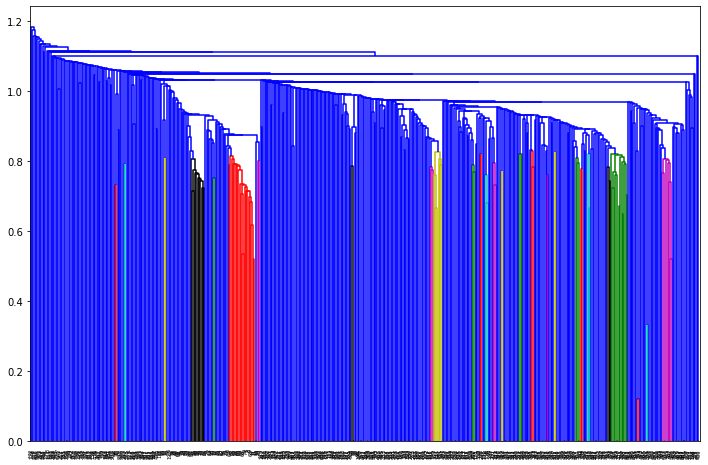

In [43]:
plt.figure(figsize = (12,8))
d = dendrogram(z)
plt.show()